# Homework 2

In [1]:
%config IPCompleter.use_jedi = False
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
np.set_printoptions(precision=4)

from pathlib import Path
fig_path = str(Path().absolute())+'/figures/hw2/'
print(fig_path)

/home/zpyang/grad_courses/2021_spring/ece595_ml/figures/hw2/


## Exercise 1

In [2]:
data_path = str(Path().absolute())+'/hw2/data/'

male_train_data = pd.read_csv(data_path+'male_train_data.csv')
female_train_data = pd.read_csv(data_path+'female_train_data.csv')
m_bmi = male_train_data['male_bmi']*0.1
m_stature = male_train_data['male_stature_mm']*0.001
f_bmi = female_train_data['female_bmi']*0.1
f_stature = female_train_data['female_stature_mm']*0.001

print('Female BMI: '+str(f_bmi.head(10).values))
print('Female Stature(m): '+str(f_stature.head(10).values))
print('Male BMI: '+str(m_bmi.head(10).values))
print('Male Stature(m): '+str(m_stature.head(10).values))

Female BMI: [2.82 2.22 2.71 2.81 2.55 2.3  3.56 3.11 2.46 4.3 ]
Female Stature(m): [1.563 1.716 1.484 1.651 1.548 1.665 1.564 1.676 1.69  1.704]
Male BMI: [3.   2.56 2.42 2.74 2.59 2.53 2.27 2.54 3.41 3.34]
Male Stature(m): [1.679 1.586 1.773 1.816 1.809 1.662 1.829 1.686 1.761 1.797]


# Exercise 2

## 2a) see hand written part

## 2b)

In [3]:
N_male = m_bmi.values.shape[0]
N_female = f_bmi.values.shape[0]
N = N_male+N_female

X = np.block([
    [np.ones(N)],
    [m_bmi.values, f_bmi.values],
    [m_stature.values, f_stature.values],
]).T
y = np.block([np.ones(N_male), -np.ones(N_female)])
yT = np.array([y]).T

theta = np.linalg.lstsq(X, y, rcond=None)[0]
theta

array([-10.7018,  -0.1234,   6.6749])

## 2c)

In [4]:
P = 3
var = cp.Variable(P)
objective = cp.Minimize(cp.sum_squares(y-X @ var))
constraints = []
prob = cp.Problem(objective=objective, constraints=constraints)
prob.solve()
theta = var.value
theta

array([-10.7018,  -0.1234,   6.6749])

## 2 d) e)

In [5]:
n = 50000
theta0 = np.zeros(3);
theta_k = theta0

A = X.T @ X
b = X.T @ y
cost_normal = []
for k in range(n):
    d_k = -2*A @ theta_k + 2*b
    alpha_k = -0.5 * (d_k.T @ d_k) /(d_k.T @ A @ d_k)
    theta_k = theta_k - alpha_k * d_k
    cost_normal.append(np.linalg.norm(y - X @ theta_k)**2/N)
cost_normal = np.array(cost_normal)
theta = theta_k
theta

array([-10.7018,  -0.1234,   6.6749])

## 2 f)

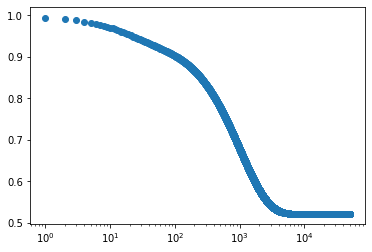

In [6]:
plt.figure()
plt.semilogx(cost_normal, 'o')
# plt.savefig()

## 2 g)

In [18]:
iterations = 50000
theta0 = np.ones(3)
A = X.T @ X
b = X.T @ y
beta = 0.9

theta_k = theta0
d_k0 = np.zeros(3)
cost_momentum = np.zeros(iterations)
for k in range(iterations):
        d_k = -2 * A @ theta_k + 2 * b
        fuck = beta * d_k0 + (1-beta) * d_k
        
        alpha_k = -0.5 * (d_k.T @ fuck)/(fuck.T @ A @ fuck)
        theta_k = theta_k - alpha_k * fuck
        d_k0 = d_k
        cost_momentum[k] = np.linalg.norm(y - X @ theta_k)**2/N
print(theta_k)


[-10.7018  -0.1234   6.6749]


/home/zpyang/grad_courses/2021_spring/ece595_ml


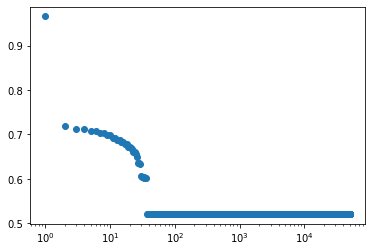

In [22]:
plt.figure()
plt.semilogx(cost_momentum, 'o')
plt.savefig(fig_path+'quiz2_q5')
import os
print(os.getcwd())


# Exercise 3

## 3 a)

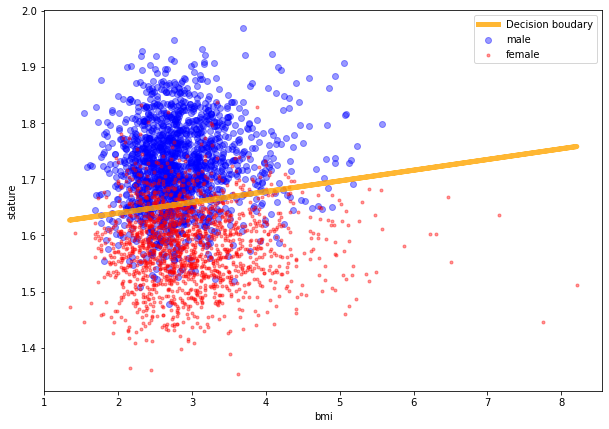

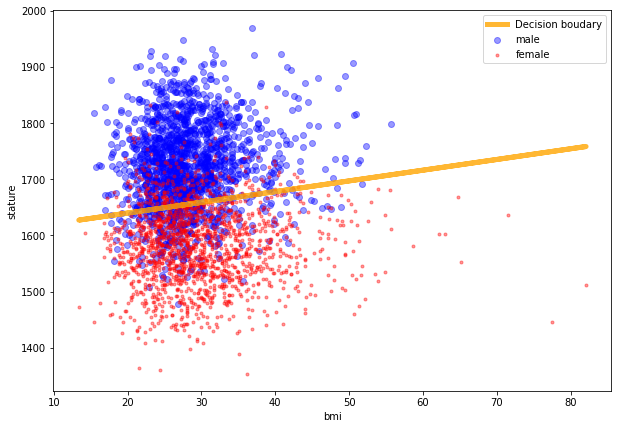

In [17]:
plt.figure(figsize=(10,7))
# plt.axis('equal')
plt.scatter(m_bmi.values, m_stature.values, color='blue', label='male',marker='o', alpha=0.4)
plt.scatter(f_bmi.values, f_stature.values, color='red', label='female', marker='.',alpha=0.4)
plt.xlabel('bmi')
plt.ylabel('stature')
x1 = np.hstack([m_bmi.values, f_bmi.values])
x2 = (-theta[0]-theta[1]*x1)/theta[2]
plt.plot(x1,x2, linewidth='5', color='orange', label='Decision boudary', alpha=0.8)
plt.legend()
# plt.savefig()

plt.figure(figsize=(10,7))
# plt.axis('equal')
plt.scatter(m_bmi.values*10, m_stature.values*1000, color='blue', label='male',marker='o', alpha=0.4)
plt.scatter(f_bmi.values*10, f_stature.values*1000, color='red', label='female', marker='.',alpha=0.4)
plt.xlabel('bmi')
plt.ylabel('stature')
x1 = np.hstack([m_bmi.values, f_bmi.values])
x2 = (-theta[0]-theta[1]*x1)/theta[2]
plt.plot(x1*10,x2*1000, linewidth='5', color='orange', label='Decision boudary', alpha=0.8)
plt.legend()
# plt.savefig()

## 3 b)

In [10]:
data_path = str(Path().absolute())+'/hw2/data/'

male_test_data = pd.read_csv(data_path+'male_test_data.csv')
female_test_data = pd.read_csv(data_path+'female_test_data.csv')
m_bmi_t = male_test_data['male_bmi']*0.1
m_stature_t = male_test_data['male_stature_mm']*0.001
f_bmi_t = female_test_data['female_bmi']*0.1
f_stature_t = female_test_data['female_stature_mm']*0.001

N_male_t = m_bmi_t.values.shape[0]
N_female_t = f_bmi_t.values.shape[0]
N_t = N_male_t + N_female_t

X_test_male = np.block([
    [np.ones(N_male_t)],
    [m_bmi_t.values],
    [m_stature_t.values],
]).T

X_test_female = np.block([
    [np.ones(N_female_t)],
    [f_bmi_t.values],
    [f_stature_t.values],
]).T

label_true_m = np.ones(N_male_t)
label_true_f = -np.ones(N_female_t)

label_f = np.sign(X_test_female @ theta)
label_m = np.sign(X_test_male @ theta)


# 3 b) i)
N_false_male = sum(label_f-label_true_f)/2
print(N_false_male)
type1_err_male = N_false_male/N_female_t
print('Type I error:',type1_err_male)

# 3 b) ii)
N_false_female = -sum(label_m - label_true_m)/2
print(N_false_female)
type2_err_male = N_false_female/N_male_t
print('Type II error:',type2_err_male)

# 3 b) iii)
N_model_male = N_false_male + N_male_t - N_false_female
precision = (N_male_t - N_false_female)/N_model_male
print('Precision:',precision)

recall = (N_male_t-N_false_female)/N_male_t
print('Recall:', recall)

71.0
Type I error: 0.14171656686626746
90.0
Type II error: 0.17964071856287425
Precision: 0.8526970954356846
Recall: 0.8203592814371258


## Exercise 4

## 4 a)

In [11]:
lambd = np.arange(0.1, 10, 0.1)

f_theta_l = lambda lamb: np.linalg.inv(X.T @ X + np.eye(3) * lamb) @ X.T @ y
theta_l_vec = [f_theta_l(lamb) for lamb in lambd]
first_term = [np.linalg.norm(X@theta-y)**2 for theta in theta_l_vec]
theta_sqr = [np.linalg.norm(theta)**2 for theta in theta_l_vec]

Text(0, 0.5, '||theta||^2')

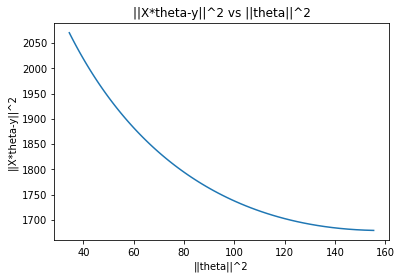

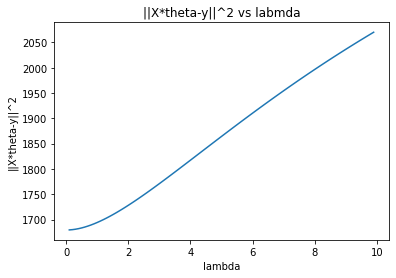

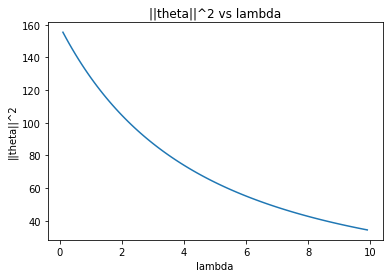

In [12]:
plt.figure()
plt.plot(theta_sqr, first_term)
plt.title('||X*theta-y||^2 vs ||theta||^2')
plt.xlabel('||theta||^2')
plt.ylabel('||X*theta-y||^2')
# plt.savefig()

plt.figure()
plt.plot(lambd, first_term)
plt.title('||X*theta-y||^2 vs labmda')
plt.xlabel('lambda')
plt.ylabel('||X*theta-y||^2')
# plt.savefig()

plt.figure()
plt.plot(lambd,theta_sqr)
plt.title('||theta||^2 vs lambda')
plt.xlabel('lambda')
plt.ylabel('||theta||^2')
# plt.savefig()

In [13]:
P = 3
var = cp.Variable(P)
objective = cp.Minimize(cp.sum_squares(y-X @ var)+ lambd[0]*cp.sum_squares(var))
constraints = []
prob = cp.Problem(objective=objective, constraints=constraints)
prob.solve()
theta = var.value
np.linalg.norm(theta)**2

155.44352320635605